# Lab 2: demo (extensions) 📓

The purpose of this lab is to add the ability to decouple parsing/writing from creating the `RNA_Molecule` object. This is an encapsulatd step that will not change the was the user would interact with this utility, but rather make the interface more flexible and less susceptible to errors coming from changes in the future.

This demo in particular shows the enhancements that we have added to teh library's interface.

In [1]:
# -- necessary setup

import os,sys
sys.path.append(os.path.abspath('src'))

from IO.RNA_IO import RNA_IO
from Structure.RNA_Molecule import RNA_Molecule
from Families.family import Family
from utils import pathify_pdb, get_pdb_ids_from_fam

RF00162


## Reading from file 🔎

Reminder on reading from files, as this is crucial step now to take into consideration

In [2]:
rna_io=RNA_IO()
pdb_path=pathify_pdb('7EAF')
mol=rna_io.read(pdb_path, "PDB")
# mol.print_all()

>> initializing new species: CALDANAEROBACTER SUBTERRANEUS SUBSP. <<
RNA_Molecule 7EAF already exists in the species CALDANAEROBACTER SUBTERRANEUS SUBSP.; not added again


## Extensions 🧩

### Species class functionality

In order to account for instanciated species, and because we dont wanna lose track of what we have created and the connection to each species with ther types, we have implemenented a class attribute `declared_species` that ensures:  
* unicity of a species instance 
* ability to access and point to equivalent species instances

This is particularly helpful with the 1-N relationship `Species` have with `RNA_Molecule` instances. 1 RNA-Molecule instance can be found in 1 Species, but 1 Species can have multiple RNA_Molecule instances. Thus we have added an attribute in Species that stores a dictionary of RNA_Molecule instances, with the key being the RNA_Molecule instance's id (to enhance lookup speed using the dict's inherent hashing compared to looping through a list). And for the relationship to be well implemented, we have added a `species` attribute in the RNA_Molecule class that points to the Species instance it belongs to. The latter is only set by appending an RNA_Molecule instance to a Species instance, and not by setting it directly (automatic handling). In this way, the `declared_species` class attribute ensures that one species instance can have multiple RNA_Molecule instances.  
_e.g., rna molecule 1 associated with E.coli species, rna molecule 2 associated with E.coli species, we would find only one E.coli species instance in the declared_species attribute, with the two RNA_Molecule instances in its rna molecules dictionary corresponding to rna1 and rna2_

In [2]:
from Families.species import Species

human=Species("Homo sapiens")
wheat=Species("Triticum aestivum")
hooman=Species('Homo sapiens')

print('checking if 2 instanciated homo sapiens species are considered equal human==hooman:',human==hooman)
print('Accessing full list of declared species:',Species.declared_species)

>> initializing new species: Homo sapiens <<
>> initializing new species: Triticum aestivum <<
> note: Species with this name already exists, will return the same instance
checking if 2 instanciated homo sapiens species are considered equal human==hooman: True
Accessing full list of declared species: [
        Species(
            name=Homo sapiens,
            rna_molecules={}
        ), 
        Species(
            name=Triticum aestivum,
            rna_molecules={}
        )]


In [3]:
rna1 = RNA_Molecule("1A9N", "NMR", human)
rna2= RNA_Molecule('8TIM','XRAY','Homo sapiens')
# -- notice how we have enabled the user to enter a string as species
# type conversion will be handeled behind the scenes

print()
print(Species.declared_species)
print()
print(human.rna_molecules.keys())

RNA_Molecule 1A9N already exists in the species Homo sapiens; not added again
> note: Species with this name already exists, will return the same instance
RNA_Molecule 8TIM already exists in the species Homo sapiens; not added again

[
        Species(
            name=Homo sapiens,
            rna_molecules={'1A9N': ID: 1A9N Experiment: NMR Homo sapiens species, '8TIM': ID: 8TIM Experiment: XRAY Homo sapiens species}
        ), 
        Species(
            name=Triticum aestivum,
            rna_molecules={}
        )]

dict_keys(['1A9N', '8TIM'])


### Family species distribution

Example on synthetic data to see how the species distribution would look like

In [4]:
fam1 = Family("1",'test1')
rna1=RNA_Molecule("1",'XRAY','Homo sapiens')
rna2=RNA_Molecule('2','XRAY','Homo sapiens')
rna3=RNA_Molecule('3','XRAY','Escherichia coli')
rna4=RNA_Molecule('4','XRAY','cervisiae')

fam1.add_RNA(rna1)
fam1.add_RNA(rna2)
fam1.add_RNA(rna3)
fam1.add_RNA(rna4)

Family created successfully
> note: Species with this name already exists, will return the same instance
RNA_Molecule 1 already exists in the species Homo sapiens; not added again
> note: Species with this name already exists, will return the same instance
RNA_Molecule 2 already exists in the species Homo sapiens; not added again
>> initializing new species: Escherichia coli <<
RNA_Molecule 3 already exists in the species Escherichia coli; not added again
>> initializing new species: cervisiae <<
RNA_Molecule 4 already exists in the species cervisiae; not added again


            Species  Count                      Label
0      Homo sapiens      2      Species: Homo sapiens
1  Escherichia coli      1  Species: Escherichia coli
2         cervisiae      1         Species: cervisiae


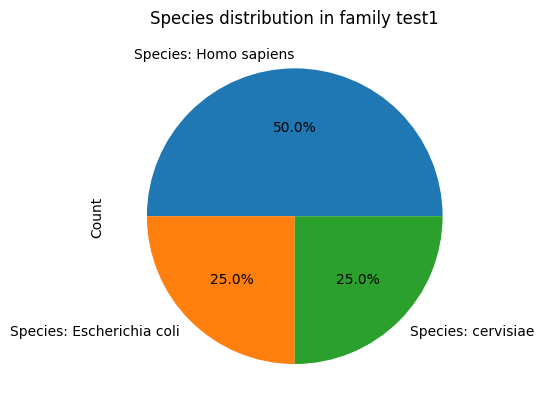

In [5]:
print(fam1.distribution())
fam1.plot_distribution()

Example on a real family (example does not hold bcs species info is not extracted from the pdb files)

In [1]:
# pdb_ids=get_pdb_ids_from_fam('RF01510')
# molecules=[]
# fam=Family(id='RF01510',name='test')

# for pdb_id in pdb_ids:
#     rna_io=RNA_IO()
#     rna=rna_io.read(pathify_pdb(pdb_id),format='PDB')
#     print(rna)
#     molecules.append(rna)
   
# -- testing